# Final Notebook

In [ ]:
# some profound observation here

In [ ]:
# and here

In [ ]:
# especially here

## Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv('data/modeling_data/mtf.csv')

In [4]:
data.head()

,yr_adminst,sampling_weight,region,msa,smsa,siblings,evr_smoked_cig,cig_month_freq,evr_drink,alcohol_lifetime_freq,...,hgh_yr_freq,pwd_alc_yr_freq,hookah_month_freq,evr_vape,vape_marj_lifetime_freq,vape_marj_yr_freq,vape_marj_month_freq,vape_flav_lifetime_freq,vape_flav_yr_freq,vape_flav_month_freq
0,1995,0.6,Midwest,1,1,1,Never,None,Unknown,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,1995,0.6,West,0,1,2,Regularly Now,2+ Packs,Unknown,40+,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,1995,0.9,Midwest,0,1,1,Regularly Now,2 Packs,Unknown,40+,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,1995,0.6,South,0,0,3+,Never,None,Unknown,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,1995,0.9,Midwest,1,1,None,Never,None,Unknown,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


<AxesSubplot:>

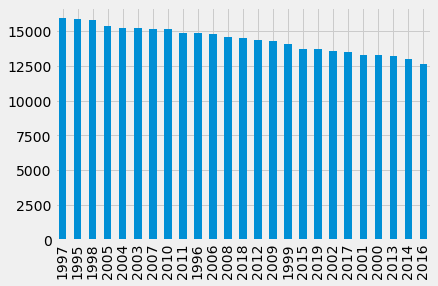

In [9]:
data.yr_adminst.value_counts().plot.bar()

In [ ]:
data..value_counts().plot.bar()

In [35]:
data.has_siblings.value_counts()

Yes        222491
No         108287
Unknown     29032
Name: has_siblings, dtype: int64

<AxesSubplot:>

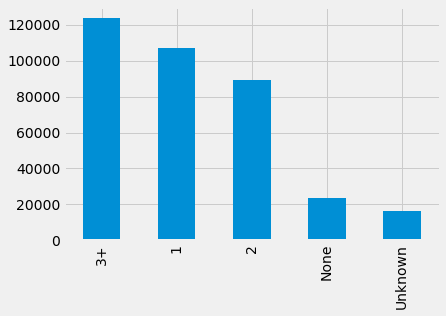

In [10]:
data.siblings.value_counts().plot.bar()

<AxesSubplot:>

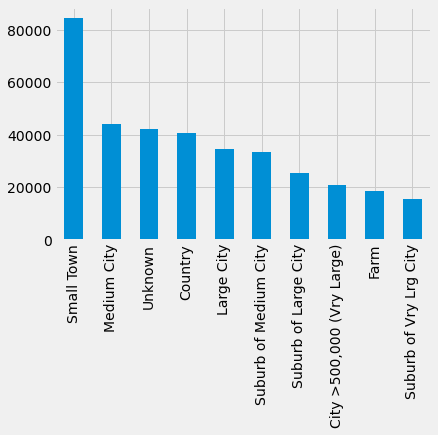

In [11]:
data.area_type.value_counts().plot.bar()

<AxesSubplot:>

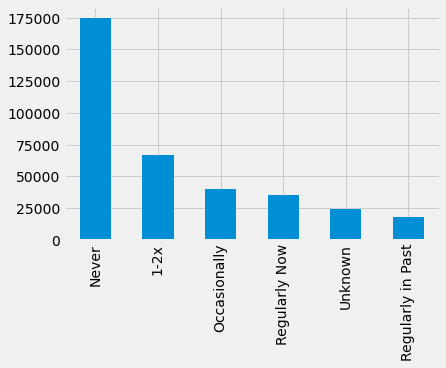

In [12]:
data.evr_smoked_cig.value_counts().plot.bar()

<AxesSubplot:>

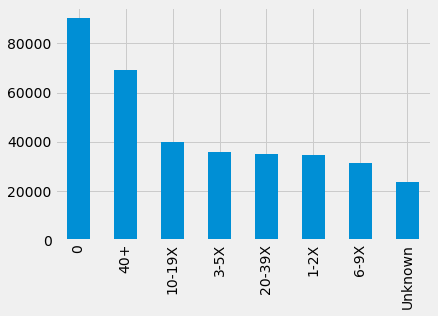

In [14]:
data.alcohol_lifetime_freq.value_counts().plot.bar()

([<matplotlib.axis.XTick at 0x7ff14c09c2b0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

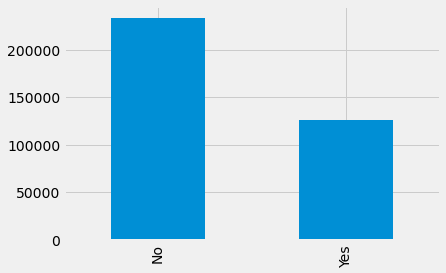

In [33]:
data.msa.value_counts().plot.bar()
plt.xticks([0,1], ['No', 'Yes'])

<AxesSubplot:>

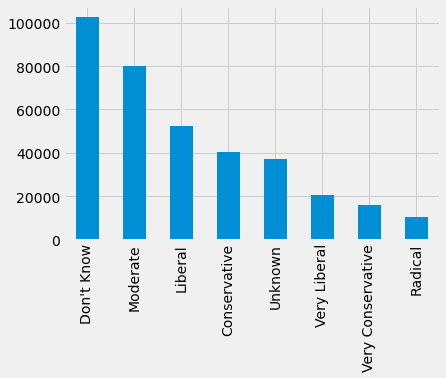

In [28]:
data.political_value_type.value_counts().plot.bar()

<AxesSubplot:>

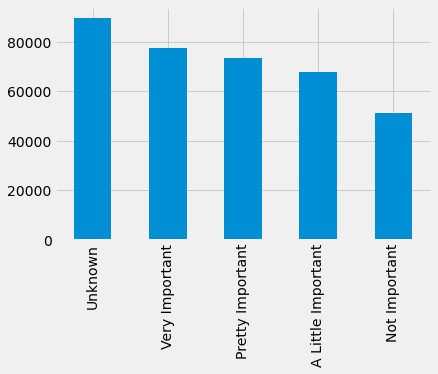

In [27]:
data.relig_importance.value_counts().plot.bar()

<AxesSubplot:>

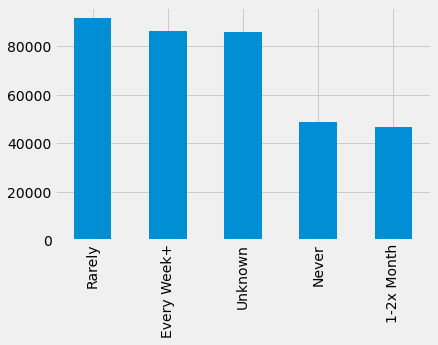

In [26]:
data.relig_attd.value_counts().plot.bar()

<AxesSubplot:>

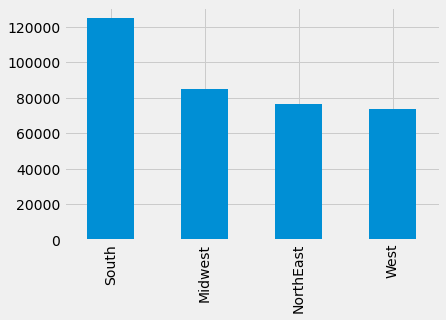

In [24]:
data.region.value_counts().plot.bar()

<AxesSubplot:>

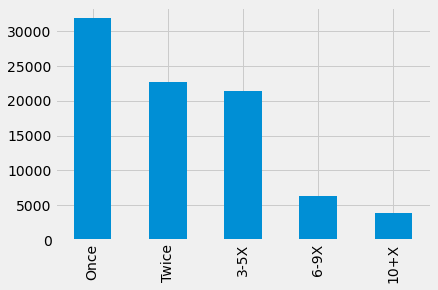

In [22]:
data.alcohol_2weeks.value_counts().iloc[2:].plot.bar()

<AxesSubplot:>

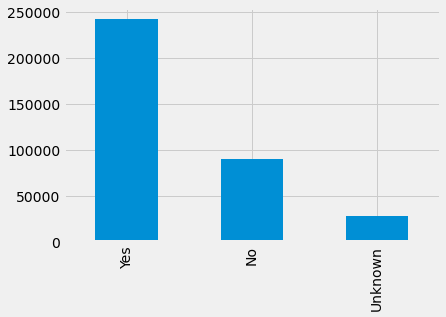

In [20]:
data.has_father.value_counts().plot.bar()

<AxesSubplot:>

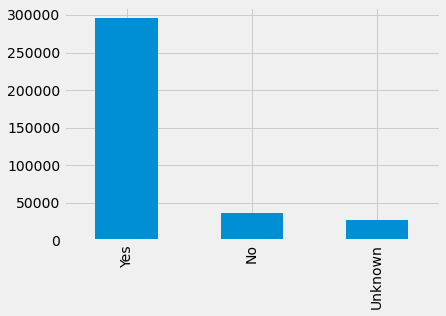

In [17]:
data.has_mother.value_counts().plot.bar()

<AxesSubplot:>

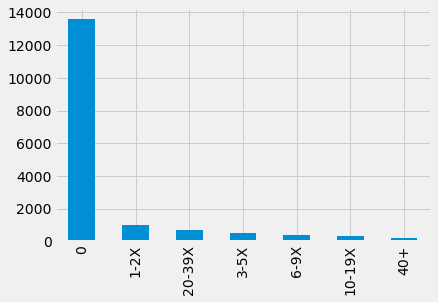

In [16]:
data.vape_marj_yr_freq.value_counts().iloc[1:].plot.bar()

<AxesSubplot:>

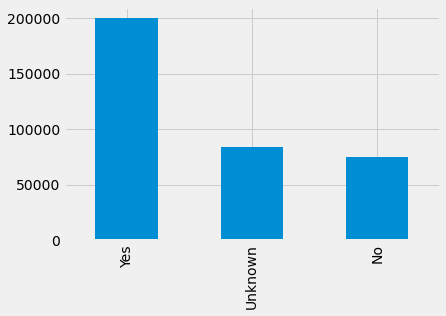

In [13]:
data.evr_drink.value_counts().plot.bar()

## Modeling

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split